<a href="https://colab.research.google.com/github/felixsimard/comp551-p2/blob/main/takuya_part1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# append the folder to the path
import sys
folder = '/content/drive/MyDrive/COMP551/mini2/'
if folder not in sys.path:
  sys.path.append(folder)

In [12]:
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
import pandas as pd
from sklearn.metrics import accuracy_score

# Additional Python files
from LogisticRegression import LogisticRegression, TrainingResults
from Gradient import *
LogisticRegression.gradient = gradient

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/COMP551/mini2/diabetes/diabetes_train.csv')
val_df = pd.read_csv('/content/drive/MyDrive/COMP551/mini2/diabetes/diabetes_val.csv')
test_df = pd.read_csv('/content/drive/MyDrive/COMP551/mini2/diabetes/diabetes_test.csv')

In [5]:
val_df.Outcome.value_counts()

0    65
1    35
Name: Outcome, dtype: int64

## Feature-Target split

In [6]:
# split into feature and target
train_X =  train_df.drop('Outcome', axis=1)
train_y = train_df.loc[:, 'Outcome']
val_X = val_df.drop('Outcome', axis=1)
val_y = val_df.loc[:, 'Outcome']
test_X = test_df.drop('Outcome', axis=1)
test_y = test_df.loc[:, 'Outcome']

In [7]:
def get_acc_list(lr, max_iters, itv):
    model = LogisticRegression(verbose=True, learning_rate=lr, max_iters=max_iters)
    acc_list = model.fit_for_vis(train_X, train_y, val_X, val_y, itv)
    return acc_list

In [8]:
def get_result(lr, max_iters=1e5, itv=1e3):
    model = LogisticRegression(verbose=True, learning_rate=lr, max_iters=max_iters)
    result = model.fit_for_vis_complex(train_X, train_y, val_X, val_y, itv)
    return result

In [16]:
def get_test_acc(result, test_X, test_y):
    model = result.lr_model
    test_yh = (model.predict(test_X) > 0.5).astype('int')
    return accuracy_score(test_y, test_yh)

## Test lr=1e-4

In [9]:
lr3=1e-4
itv3 = int(1e3)
m4_result = get_result(lr3, max_iters=1e5, itv=itv3)

(600, 9)
learning rate: 0.0001
batch size: 600
terminated after 100000 iterations, with norm of the gradient equal to 0.034307864937074266
the weight found: [ 0.13152847  0.014274   -0.02976018 -0.00115303  0.00150239 -0.00238826
  0.06590202 -0.01156154 -0.34707329]
time elapsed:  75.06 seconds



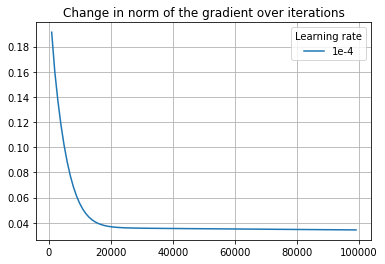

In [10]:
# Create plot
grad_list = m4_result.grad_list_it
length = len(grad_list)
row = list(range(1, length*itv3, itv3))
plt.plot(row, grad_list)
plt.legend(['1e-4'], title='Learning rate')
plt.grid()
plt.title("Change in norm of the gradient over iterations")
plt.savefig('/content/drive/MyDrive/COMP551/mini2/figures/part1_1_base_grad.png')

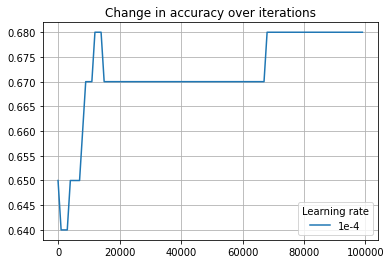

In [ ]:
# Create plot
acc_list = m4_result.acc_list_it
length = len(acc_list)
row = list(range(1, length*itv3, itv3))
plt.plot(row, acc_list)
plt.legend(['1e-4'], title='Learning rate')
plt.grid()
plt.title("Change in accuracy over iterations")
plt.savefig('/content/drive/MyDrive/COMP551/mini2/figures/part1_1_base_acc.png')

In [18]:
# test set accuracy
test_result = get_result(lr=1e-4, max_iters=2e4, itv=1e2)
print(get_test_acc(test_result, test_X, test_y))

(600, 9)
learning rate: 0.0001
batch size: 600
terminated after 20000 iterations, with norm of the gradient equal to 0.03688797641062749
the weight found: [ 0.12707092  0.01360153 -0.03072391 -0.00098248  0.00157526 -0.00516213
  0.01310926 -0.0114703  -0.07150881]
time elapsed:  15.04 seconds

0.7205882352941176


## Test learning rates above 1

In [ ]:
%%time
lr_list1 = [1, 1e1, 1e2, 1e3, 1e4]
itv1 = int(1e3)
result_list = [get_result(lr, max_iters=2e5, itv=itv1) for lr in lr_list1]

(600, 9)
learning rate: 1
batch size: 600
terminated after 200000 iterations, with norm of the gradient equal to 66.56409797471885
the weight found: [  568.83190777    82.95284021   -74.84987054   -20.38401619
    32.45030625    39.70891436   966.26055555   -38.98668413
 -6034.88646167]
time elapsed:  150.48 seconds

(600, 9)
learning rate: 10.0
batch size: 600
terminated after 200000 iterations, with norm of the gradient equal to 66.39563825123993
the weight found: [  5684.70342579    831.9601254    -743.81964607   -201.14709231
    326.28187707    399.2057158    9654.83916506   -387.76527405
 -60343.22280011]
time elapsed:  150.16 seconds

(600, 9)
learning rate: 100.0
batch size: 600
terminated after 200000 iterations, with norm of the gradient equal to 66.5819605006705
the weight found: [  56859.87077745    8182.26269639   -7543.62704699   -2071.19653205
    3237.94383393    3933.42210139   96593.31373223   -3928.67975562
 -603467.65834113]
time elapsed:  150.41 seconds

(600, 9)
l

In [ ]:
accs_list1 = [r.acc_list_it for r in result_list]

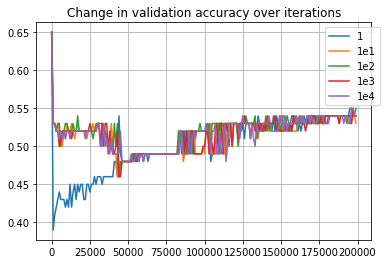

In [ ]:
# Create plot
length = len(accs_list1[0])
row = list(range(1, length*itv1, itv1))
[plt.plot(row, accs_list1[i]) for i in range(len(accs_list1))]
plt.legend(['1', '1e1', '1e2', '1e3', '1e4'], bbox_to_anchor=(1.04,1))
plt.grid()
plt.title("Change in validation accuracy over iterations")
plt.savefig('/content/drive/MyDrive/COMP551/mini2/figures/lrs_compare_max_itrs=2e5.png', bbox_inches="tight")

## Plot norm of the gradient for our base configuration
lr=1e-5, max_iters=2e5

In [ ]:
itv2 = itv1
temp_result = get_result(1e-5, max_iters=2e5, itv=itv1)

(600, 9)
learning rate: 1e-05
batch size: 600
terminated after 200000 iterations, with norm of the gradient equal to 0.036888135543025
the weight found: [ 0.12706968  0.01360151 -0.0307239  -0.00098248  0.00157525 -0.00516213
  0.01310926 -0.0114701  -0.07150881]
time elapsed:  142.90 seconds



Text(0.5, 1.0, 'Change in norm of the gradient over iterations')

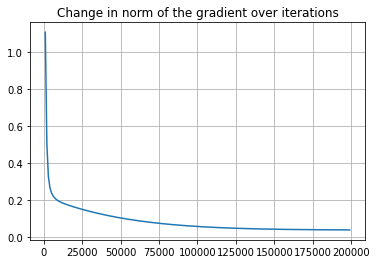

In [ ]:
# Create plot
grad_list = temp_result.grad_list_it
length = len(grad_list)
row = list(range(1, length*itv2, itv2))
plt.plot(row, grad_list)
#plt.legend(['1', '1e1', '1e2', '1e3', '1e4'], bbox_to_anchor=(1.04,1))
plt.grid()
plt.title("Change in norm of the gradient over iterations")
#plt.savefig('/content/drive/MyDrive/COMP551/mini2/figures/lrs_compare_max_itrs=2e5.png', bbox_inches="tight")

## Test learning rates below 0.2

Try the following learning rates: [0.2, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

In [ ]:
# configuration
max_iter = 1e6
itv = int(1e3)
lr_list = [0.2, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

In [ ]:
# parallerize training
accs_list = Parallel(n_jobs=-1, verbose=10)(delayed(get_acc_list)(i, max_iter, itv) for i in lr_list)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 23.6min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 31.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 31.3min finished


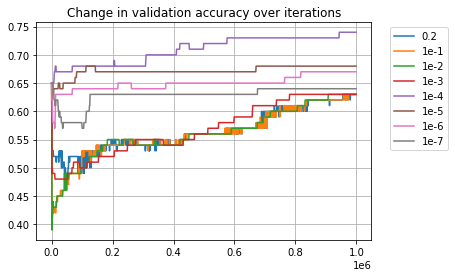

In [ ]:
# Create plot
length = len(accs_list[0])
row = list(range(1, length*itv, itv))
[plt.plot(row, accs_list[i]) for i in range(len(accs_list))]
plt.legend(['0.2', '1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7'],
           bbox_to_anchor=(1.04,1))
plt.grid()
plt.title("Change in validation accuracy over iterations")
plt.savefig('/content/drive/MyDrive/COMP551/mini2/figures/lrs_compare_max_itrs=1e6.png', bbox_inches="tight")

Now, increase the max_iters and try again with [1e-4, 1e-5, 1e-6, 1e-7].

In [ ]:
# configuration
new_max_iter = 3*(1e6)
new_itv = int(1e4)
new_lr_list = [1e-4, 1e-5, 1e-6, 1e-7]

In [ ]:
new_accs_list = []
for i in range(len(new_lr_list)):
    result = get_acc_list(new_lr_list[i], new_max_iter, new_itv)
    print('\n')
    new_accs_list.append(result)

terminated after 3000000 iterations, with norm of the gradient equal to 0.009055883681953803
the weight found: [ 1.32319999e-01  2.81401475e-02 -1.66189784e-02 -2.77309928e-03
  1.51703686e-04  5.39611332e-02  6.17168404e-01  3.58746135e-03
 -5.56318969e+00]
time elapsed:  742.58 seconds


terminated after 3000000 iterations, with norm of the gradient equal to 0.030759426504308147
the weight found: [ 0.12950679  0.01574091 -0.02754224 -0.00150766  0.00131935  0.00407726
  0.17113651 -0.0096257  -0.98839465]
time elapsed:  744.93 seconds


terminated after 3000000 iterations, with norm of the gradient equal to 0.03569813470454591
the weight found: [ 0.13127481  0.01373776 -0.03063641 -0.00100074  0.00157156 -0.00478922
  0.02007397 -0.01208031 -0.10658963]
time elapsed:  741.24 seconds


terminated after 3000000 iterations, with norm of the gradient equal to 0.136915677637244
the weight found: [ 0.05221273  0.01255442 -0.0305826  -0.00097407  0.00148354 -0.00601824
  0.00166148  0.00064

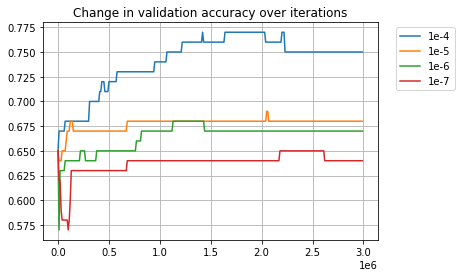

In [ ]:
# Create plot
new_length = len(new_accs_list[0])
new_row = list(range(0, new_length*new_itv, new_itv))
[plt.plot(new_row, new_accs_list[i]) for i in range(len(new_accs_list))]
plt.legend(['1e-4', '1e-5', '1e-6', '1e-7'],
           bbox_to_anchor=(1.04,1))
plt.grid()
plt.title("Change in validation accuracy over iterations")
plt.savefig('/content/drive/MyDrive/COMP551/mini2/figures/lrs_compare_max_itrs=3_1e6.png',
            bbox_inches="tight")

## Base Configuration
From the plot above, the best configuration we found is:
* max_iters = 1.8e6
* lr = 1e-4

However, to ease later trainings, we'll use:
* **max_iters = 2e4**
* **lr = 1e-4**

as our base configuration.


---------------------------
epsilon=1e-4 (default value) but the norm of the gradient didn't decrease below 1e-4 in my experiments, so this parameter is not tuned.